In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

C:\Users\INTEL WIN11PRO(12TH)\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('resident population_income_consumption_floating population.csv', encoding = 'utf-8', index_col = 'district')
df.drop('Unnamed: 0',axis =1, inplace = True)

FileNotFoundError: [Errno 2] No such file or directory: 'resident population_income_consumption_floating population.csv'

In [ ]:
df.columns

In [35]:
select_columns = ['income_all','FRNR_ALL_EXPNDTR_PRICE','floating_population']

df = df[select_columns]

In [36]:
df = df.dropna()
df = df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df = df.astype('float64')

data_copy = df.copy()
data_c = data_copy.values

scaler = StandardScaler()
data_c = scaler.fit_transform(data_c)

C:\Users\INTEL WIN11PRO(12TH)\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


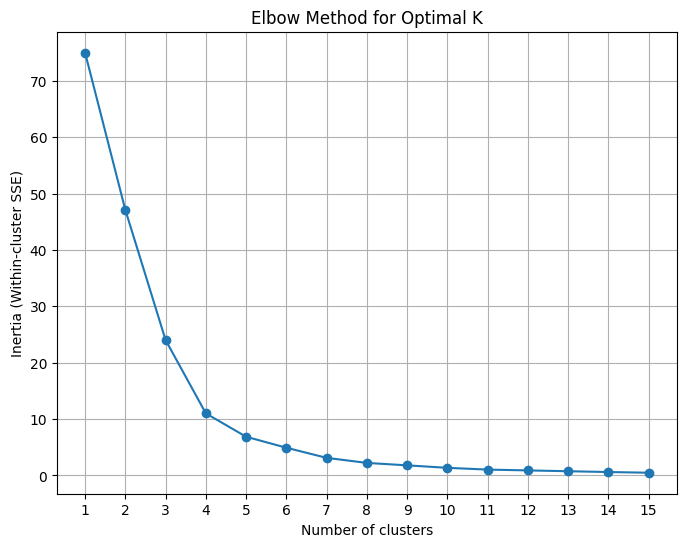

<Figure size 640x480 with 0 Axes>

In [37]:
cluster_range = range(1, 16)
inertia = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data_c)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()
plt.savefig('elbow_method_result.png')

In [38]:
kmeans = KMeans(n_clusters=4, max_iter=100, verbose=1)
clusters = kmeans.fit_predict(data_c)

Initialization complete
Iteration 0, inertia 27.41746926038082
Iteration 1, inertia 20.470097111537047
Iteration 2, inertia 16.295809503932862
Iteration 3, inertia 13.928131245076194
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 18.63886360612312
Iteration 1, inertia 11.014874908144973
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 31.091747761993336
Iteration 1, inertia 25.146133959140638
Iteration 2, inertia 24.190819441878375
Iteration 3, inertia 22.653655342579853
Iteration 4, inertia 20.470097111537047
Iteration 5, inertia 16.295809503932862
Iteration 6, inertia 13.928131245076194
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 22.735233206977735
Iteration 1, inertia 13.916063183107143
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 16.453461643125735
Iteration 1, inertia 11.014874908144973
Converged at itera

In [39]:
cluster_nums = []
for doc_num, cluster_num in enumerate(clusters): 
    cluster_nums.append(cluster_num)
    print(doc_num, cluster_num)

0 3
1 0
2 0
3 0
4 2
5 2
6 1
7 2
8 0
9 0
10 2
11 2
12 2
13 2
14 0
15 0
16 2
17 0
18 0
19 1
20 2
21 0
22 2
23 3
24 0


In [40]:
kmeans.labels_

array([3, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 0,
       2, 3, 0])

In [41]:
data_copy['레이블'] = cluster_nums

In [42]:
data_copy.head(20)

,income_all,FRNR_ALL_EXPNDTR_PRICE,floating_population,레이블
district,,,,
강남구,1038.408,1.564122e+09,6369370.0,3
강동구,811.208,1.732819e+07,1952698.0,0
강북구,878.592,7.377850e+06,991804.0,0
강서구,1109.408,2.124256e+08,2769849.0,0
관악구,3048.400,4.346821e+07,4041722.0,2
광진구,2931.000,8.652487e+07,2947243.0,2
구로구,4589.000,6.396364e+07,9579237.0,1
금천구,2667.208,4.634691e+07,5836500.0,2
노원구,908.192,1.591175e+07,1426320.0,0


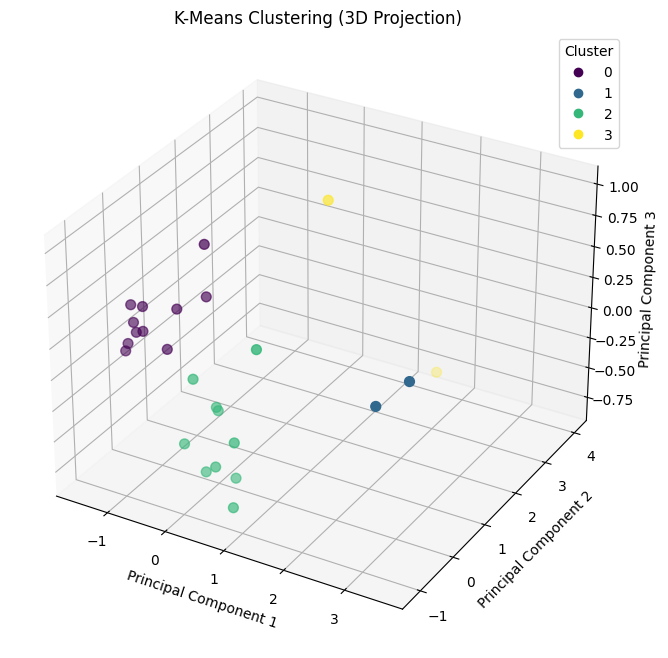

<Figure size 640x480 with 0 Axes>

In [43]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


pca = PCA(n_components=3)
data_3d = pca.fit_transform(data_c)

# K-Means 클러스터링 결과
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=clusters, cmap='viridis', s=50)
ax.set_title('K-Means Clustering (3D Projection)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Cluster')
plt.show()


plt.savefig('clustering_3D.png',dpi = 300)

In [45]:
cluster_mean= data_copy.groupby('레이블').mean().reset_index()
cluster_mean.to_csv('클러스터링_레이블별_칼럼별(3개)_지표.csv', encoding = 'utf-8-sig')
# data_copy.to_csv('데이터_레이블_달린거.csv', encoding = 'utf-8-sig')